In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import hmmnorm as hmm
import importlib


from hmmlearn import hmm as hml
import Function_garch as fg


data = fg.load_Sp500()
logreturns = fg.logf_diff(data)

ret2000 = logreturns["2000"]
ret2004 = logreturns["2004"]
ret2008 = logreturns["2008"]
ret2012 = logreturns["2012"]
ret2016 = logreturns["2016"]


data2 = fg.load_nasdaq()
logreturns = fg.logf_diff(data2)

ret2000_n = logreturns["2000"]
ret2004_n = logreturns["2004"]
ret2008_n = logreturns["2008"]
ret2012_n = logreturns["2012"]
ret2016_n = logreturns["2016"]


def ImplementOptim(logreturns):
    optim = hmm.optimize(logreturns)
    optimparam = optim.x
    p1filt, p2filt = hmm.generate_p(optimparam,logreturns)
    states = hmm.hmm(p1filt,p2filt)
    var1 = optimparam[2]
    sigma1 = math.sqrt(var1)
    var2 = optimparam[5]
    sigma2 = math.sqrt(var2)
    pfiltnorm = p1filt*var1 + p2filt*var2

    
    print(p1filt)
    print(p2filt)

    print(sigma1)
    print(sigma2)
    
    return states, pfiltnorm




def plot(returns):

    x= range(len(returns))
    y_ret = returns
    y_garch = fg.generer_estime(np.array(returns))[1]
    
    y_states, y_pfilt = ImplementOptim(returns)
    
    fig, axs = plt.subplots(figsize = (20,8))
    axs2 = axs.twinx()
    

    axs.plot(x, y_ret, color = "silver")
    axs.set_ylabel('Return')
    axs.yaxis.label.set_color("silver")
    
    
    axs2.plot(x, y_garch * np.sqrt(252), label = "GARCH")
    axs2.plot(x, y_pfilt * np.sqrt(252), label="HMM")
    axs2.legend(['GARCH','HMM'])
    
    axs2.set_xlabel('Time')
    axs2.set_ylabel('Volatility')

    plt.show()


#states2000,pfilt2000 = ImplementOptim(ret2000)
#states2004,pfilt2004 = ImplementOptim(ret2004)
#states2008,pfilt2008 = ImplementOptim(ret2008)
#states2012,pfilt2012 = ImplementOptim(ret2012)
#states2016, pfilt2016 = ImplementOptim(ret2016)

#plot(ret2000,pfilt2000)
#plot(ret2004,pfilt2004)
#plot(ret2008,pfilt2008)
#plot(ret2012,pfilt2012)
#plot(ret2016,pfilt2016)





c:\Users\loicb\OneDrive\Bureau\vscode\rsdc2\RSDC\Function_garch.py:98: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
c:\Users\loicb\OneDrive\Bureau\vscode\rsdc2\RSDC\hmmnorm.py:131: RuntimeWarning: invalid value encountered in double_scalars
  p1filt[0] = ((1 - p22) / (2 - p11 - p22))
c:\Users\loicb\OneDrive\Bureau\vscode\rsdc2\RSDC\hmmnorm.py:132: RuntimeWarning: invalid value encountered in double_scalars
  p2filt[0] = ((1 - p11) / (2 - p11 - p22))
c:\Users\loicb\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


[0.58898856 0.99698908 0.97956049 ... 0.03183881 0.04857768 0.04012475]
[0.41101144 0.00301092 0.02043951 ... 0.96816119 0.95142232 0.95987525]
1.4142135623730951
0.8934621448942663


AttributeError: 'YAxis' object has no attribute 'set_color'

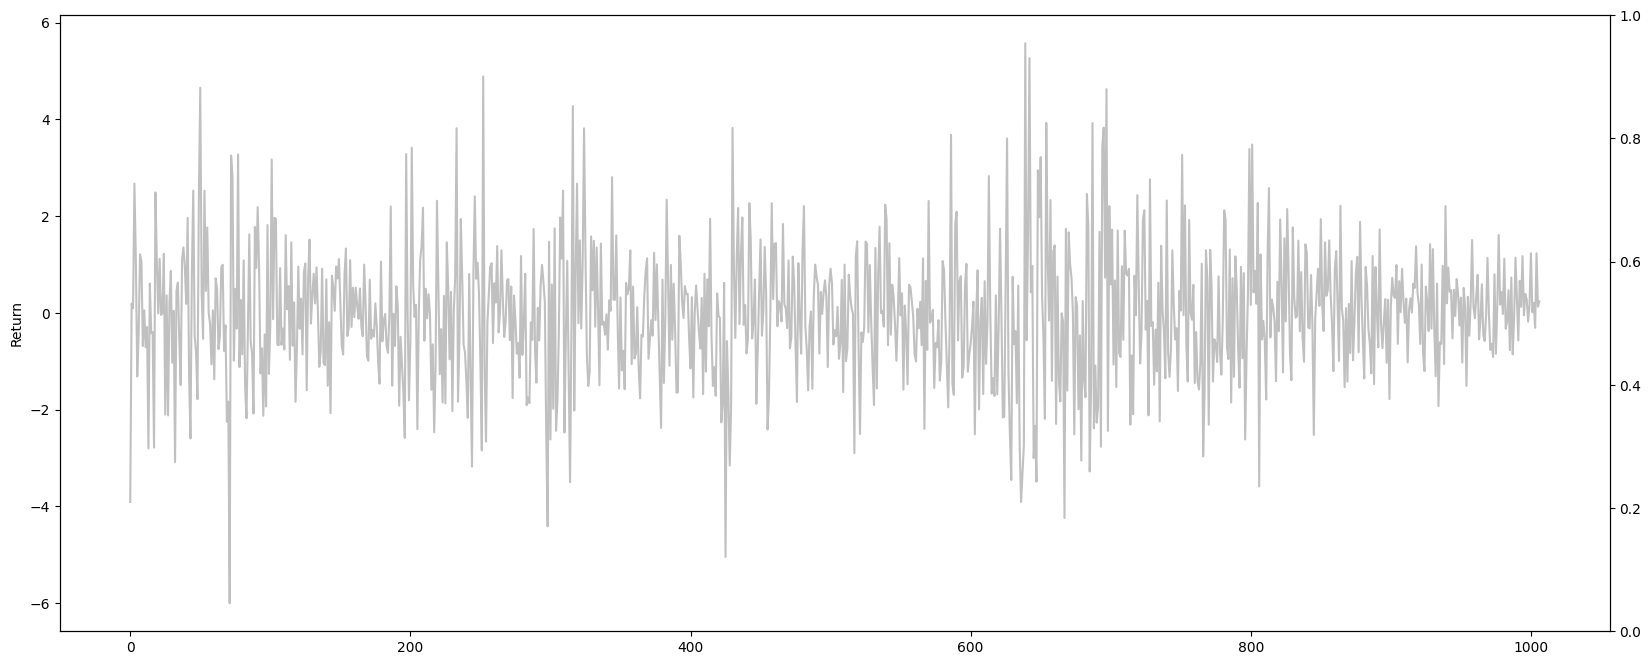

In [29]:

plot(ret2000)
plot(ret2004)
plot(ret2008)
plot(ret2012)
plot(ret2016)



[1.51728602e-09 1.51727947e-09 1.51728636e-09 ... 1.51728644e-09
 1.51728559e-09 1.51728640e-09]
[1. 1. 1. ... 1. 1. 1.]
1.414213154127
1.4142135527585096


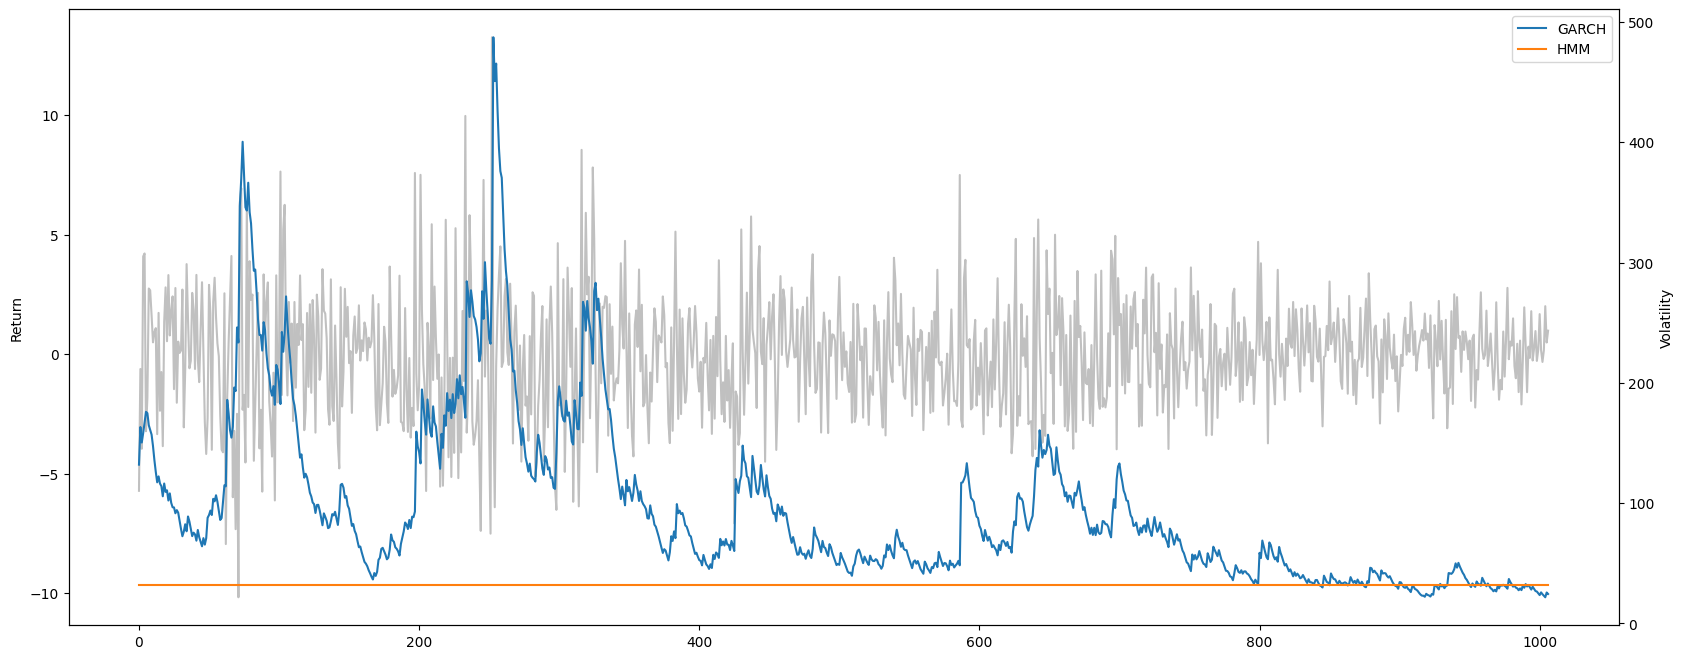

[5.74857556e-01 6.16179379e-01 5.90778011e-01 ... 1.90761348e-05
 1.99968952e-02 1.66045859e-03]
[0.42514244 0.38382062 0.40922199 ... 0.99998092 0.9800031  0.99833954]
0.7565174336776456
1.2444174760714264


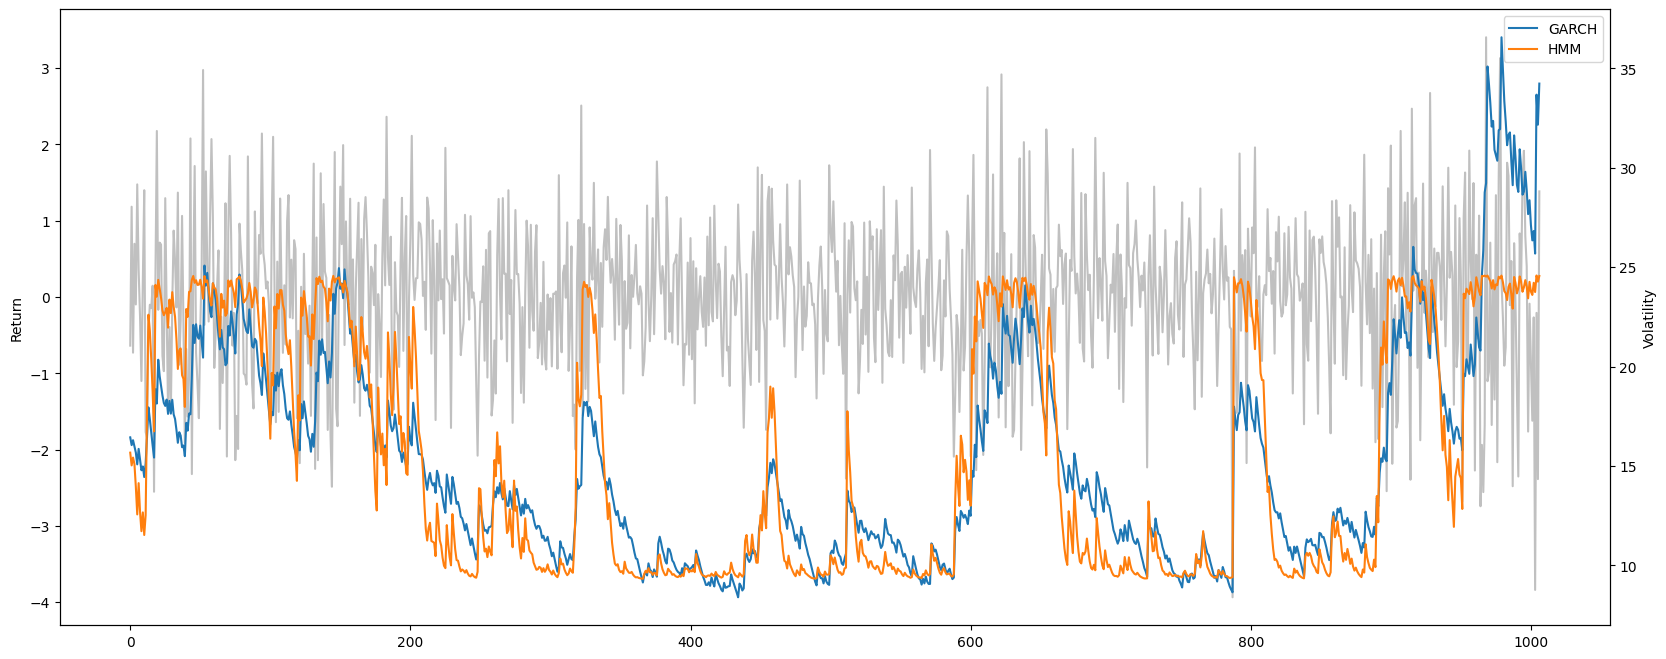

[2.57824822e-02 3.71274936e-07 2.37397495e-03 ... 4.69529405e-05
 3.63731437e-04 7.25608872e-05]
[0.97421752 0.99999963 0.99762603 ... 0.99995305 0.99963627 0.99992744]
1.4142135623730951
1.414213562373095


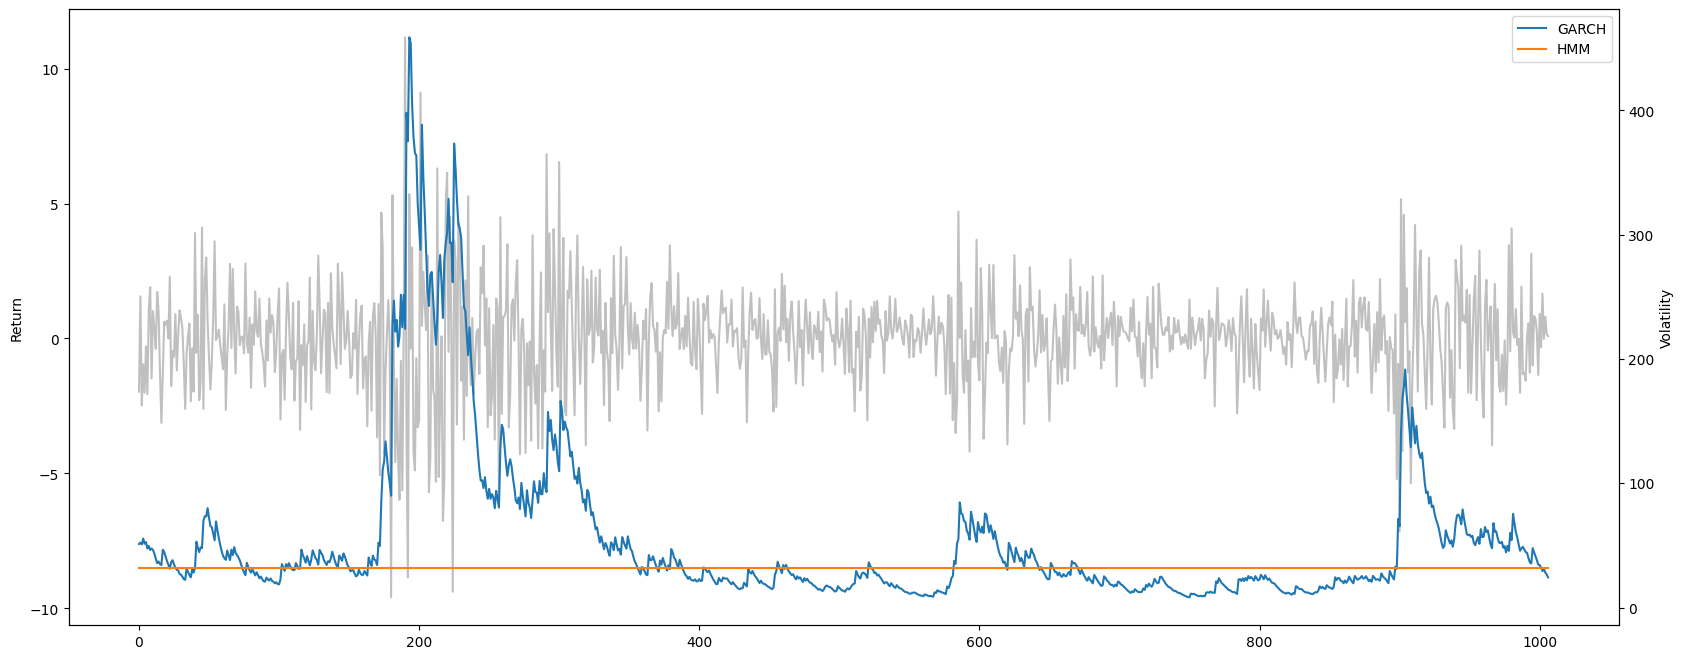

[4.99436341e-01 6.74833142e-01 7.72696964e-01 ... 9.06322974e-07
 3.87416171e-02 2.12876296e-01]
[0.50056366 0.32516686 0.22730304 ... 0.99999909 0.96125838 0.7871237 ]
0.5700176178947058
1.1728897213664826


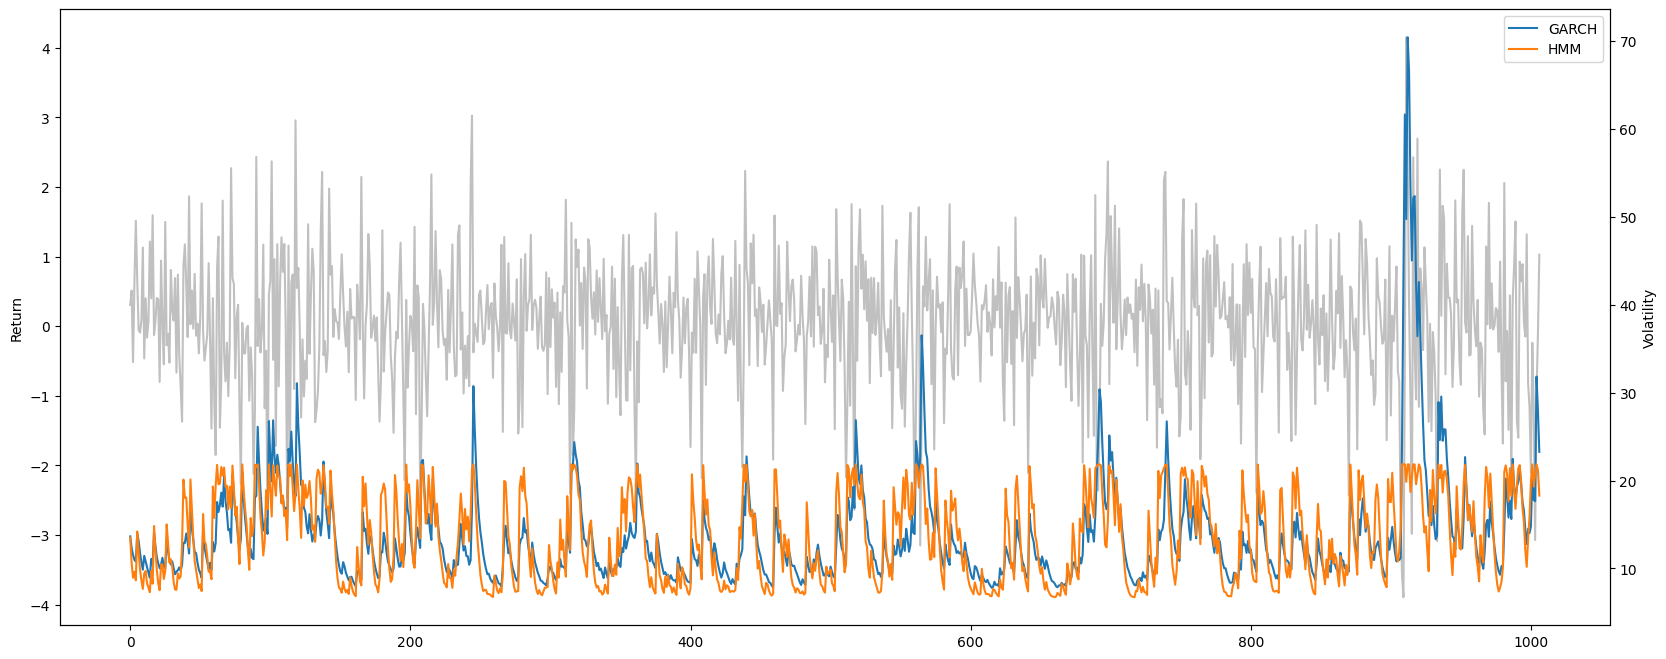

[6.57605411e-01 8.52140420e-02 6.96167933e-06 ... 9.42532920e-01
 9.52990902e-01 9.21859666e-01]
[0.34239459 0.91478596 0.99999304 ... 0.05746708 0.0470091  0.07814033]
0.5760803167164283
1.4142135623730951


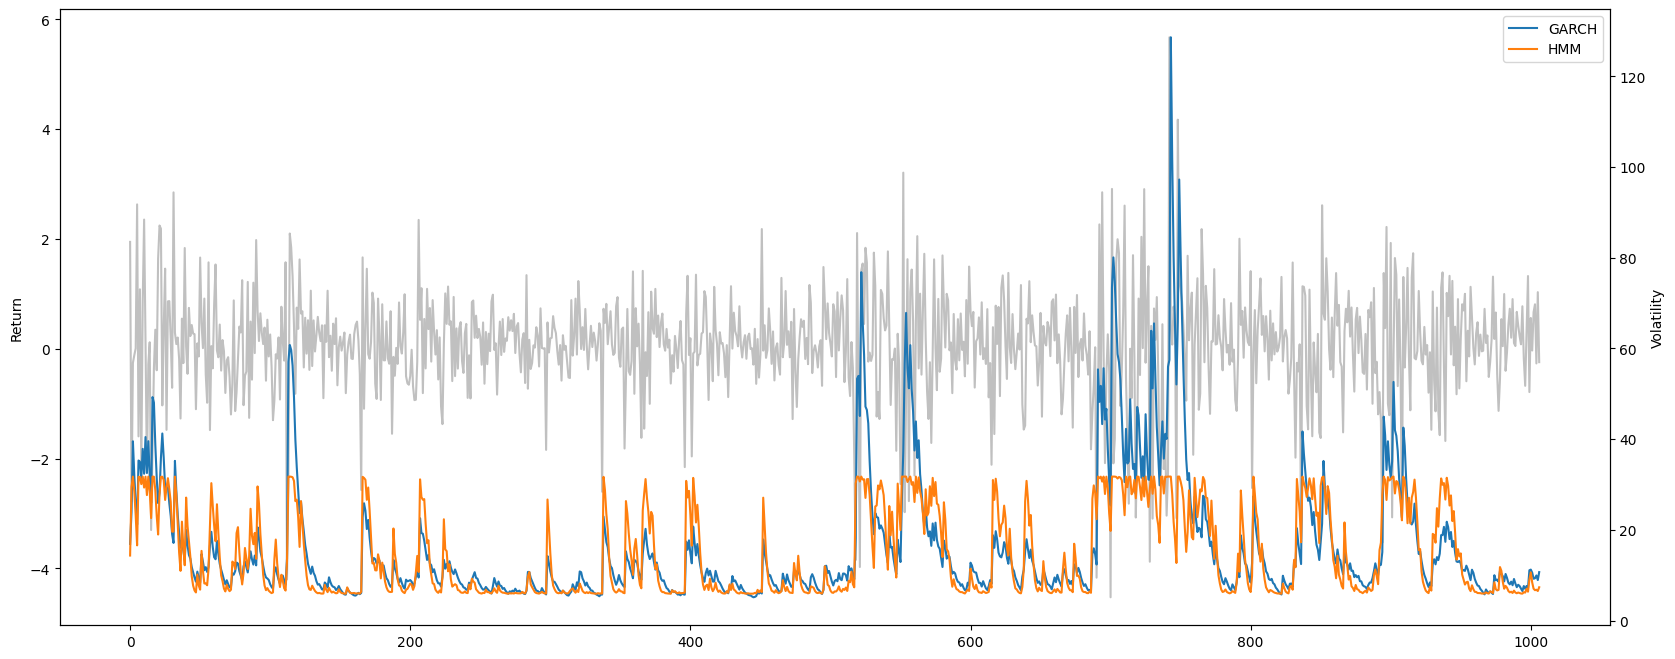

In [ ]:

plot(ret2000_n)
plot(ret2004_n)
plot(ret2008_n)
plot(ret2012_n)
plot(ret2016_n)